In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/breast_cancer_survival.csv")
print(data)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [56]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, random_state=100)
print(df_train)
print(df_test)
print(df_train.shape, df_test.shape)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
210   62  FEMALE  0.104640  0.702800 -0.298980  0.601030            2   
219   54  FEMALE -0.282720  0.608420 -0.474030  0.617170            2   
223   68  FEMALE -0.260000  0.860440  0.076732  0.186700            2   
133   51  FEMALE  0.008438  1.401900  0.121600 -2.025500            2   
315   71  FEMALE  0.355240  1.975200 -0.013443  0.550760            3   
..   ...     ...       ...       ...       ...       ...          ...   
69    63  FEMALE  0.202790 -0.043384  0.775040  0.620110            1   
55    62  FEMALE -0.384440  1.004000 -0.638570 -0.544660            2   
82    46  FEMALE -0.740140 -0.737550  0.720320  0.721820            2   
295   47  FEMALE -0.190060  1.977900 -0.007615  0.035325            2   
8     58  FEMALE -1.268500  0.106130  1.135200 -0.394920            2   

                          Histology  ERstatus  PRstatus HER2status  \
210   Infiltrating Ductal Carcinoma  Positive  Positi

In [50]:
target= data['Patient_Status']
features = data.drop(columns = 'Patient_Status')
print(target)
print(features)


0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 317, dtype: object
     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340            2   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320            2   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815            2   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            1   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210            2   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320            2   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            1   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860            2   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820            2   
333   66  FEMALE  0.286380   1.39980  0.318830  0

In [51]:
from sklearn.model_selection import train_test_split
column_name_mapping = {'ER status': 'ERstatus', 'PR status': 'PRstatus', 'HER2 status': 'HER2status'}
data.Patient_Status[data.Patient_Status == 'Alive'] = 1
data.Patient_Status[data.Patient_Status == 'Dead'] = 0
print("after changing Alive to 1 and dead to 0\n")
# Use the rename() method to change the column names
data.rename(columns=column_name_mapping, inplace=True)
data.HER2status[data.HER2status== 'Positive'] = 1
data.HER2status[data.HER2status== 'Negative'] = 0
data.Tumour_Stage[data.Tumour_Stage == 'II'] = 2
data.Tumour_Stage[data.Tumour_Stage == 'I'] = 1
data.Tumour_Stage[data.Tumour_Stage == 'III'] = 3
data.Surgery_type[data.Surgery_type == 'Other'] = 1
data.Surgery_type[data.Surgery_type == 'Lumpectomy'] = 2
data.Surgery_type[data.Surgery_type == 'Modified Radical Mastectomy'] = 3
data.Surgery_type[data.Surgery_type == 'Simple Mastectomy'] = 4
data = data.dropna()
y= data['Patient_Status']
print("TARGET\n",y)
X = data.drop(columns = ['Date_of_Surgery','Date_of_Last_Visit','Histology','Gender','ERstatus','PRstatus'])
print("FEATURES\n",X)

after changing Alive to 1 and dead to 0

TARGET
 0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 317, dtype: object
FEATURES
      Age  Protein1  Protein2  Protein3  Protein4 Tumour_Stage HER2status  \
0     42  0.952560   2.15000  0.007972 -0.048340            2          0   
1     54  0.000000   1.38020 -0.498030 -0.507320            2          0   
2     63 -0.523030   1.76400 -0.370190  0.010815            2          0   
3     78 -0.876180   0.12943 -0.370380  0.132190            1          0   
4     42  0.226110   1.74910 -0.543970 -0.390210            2          1   
..   ...       ...       ...       ...       ...          ...        ...   
329   59  0.024598   1.40050  0.024751  0.280320            2          1   
330   41  0.100120  -0.46547  0.472370 -0.523870            1          1   
331   54  0.753820   1.64250 -0.332850  0.857860            2          0   
332   74  0.972510   1.42680 -0.3

<ipython-input-51-7f85830244c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Patient_Status[data.Patient_Status == 'Alive'] = 1
<ipython-input-51-7f85830244c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Patient_Status[data.Patient_Status == 'Dead'] = 0
<ipython-input-51-7f85830244c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.HER2status[data.HER2status== 'Positive'] = 1
<ipython-input-51-7f85830244c3>:9: 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)



In [62]:
from sklearn.neighbors import KNeighborsClassifier
# Split into training and test set
from sklearn.model_selection import train_test_split
accu_train=[]
accu_test=[]
for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accu_train[i] = knn.score(X_train_scaled, y_train)
    accu_test[i] = knn.score(X_test_scaled, y_test)
print("accuracy train:",accu_train)
print("accuracy test:",accu_test)

IndexError: ignored

[1.         0.99209486 0.99604743 0.99209486 0.99604743 0.99604743
 0.99604743 0.99604743 0.99604743 0.99209486 0.99604743 0.99604743
 0.99604743 0.99209486 0.99604743 0.98418972 0.98814229 0.98814229
 0.98814229]
[1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       0.984375
 0.984375 0.984375 0.984375]


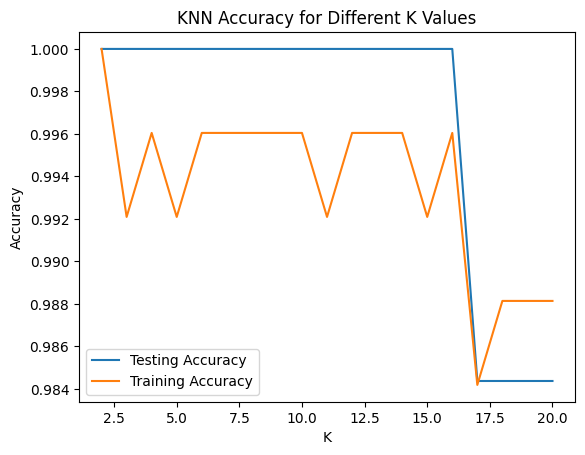

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_accuracy = np.empty(19)
test_accuracy = np.empty(19)


for i, k in enumerate(range(2, 21)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

print(train_accuracy)
print(test_accuracy)
plt.title('KNN Accuracy for Different K Values')
plt.plot(range(2, 21), test_accuracy, label='Testing Accuracy')
plt.plot(range(2, 21), train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [99]:
df = pd.read_csv("/content/drive/MyDrive/Japan_life_expectancy.csv")
df.head()

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,Akita,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,Aomori,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,Chiba,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


In [101]:
y = df['Life_expectancy']
Df = df.drop(columns = 'Prefecture',axis = 1)
Df.head()

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,319.45,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,257.30,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,254.50,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,314.95,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,272.50,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


In [102]:
train, valid, test = np.split(Df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(Df))])
def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

train, X_train, y_train = scale_dataset(train)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

mean squared error list: [0.31082999999999844, 0.17588749999999798, 0.19598777777777582, 0.17620000000000052, 0.12878239999999913, 0.13065527777777505, 0.10703714285714316, 0.12993656249999969, 0.1211295061728394, 0.1266364999999985, 0.13556454545454516, 0.1437998611111095, 0.1559103550295855, 0.1628217857142849, 0.1679667111111105, 0.1687866796874974, 0.1754152941176436, 0.18071672839505767, 0.18515074792243222, 0.187485249999997]
least mean squared error occured = 0.10703714285714316
least mse is occured at k value =  6


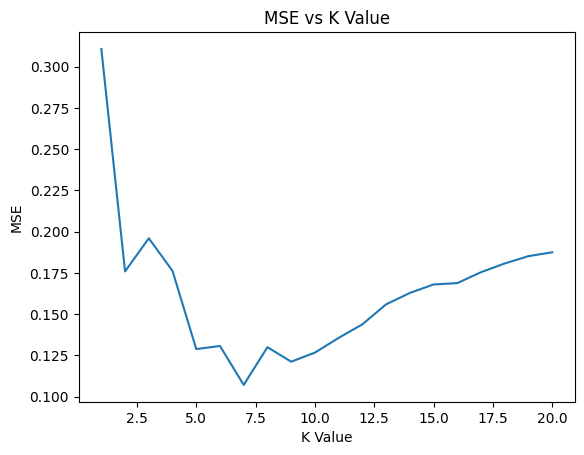

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mse_values = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
print("mean squared error list:",mse_values)
print("least mean squared error occured =",min(mse_values))
minimum = min(mse_values)
print("least mse is occured at k value = ",mse_values.index(minimum))
# Plot the results
plt.plot(range(1, 21), mse_values)
plt.title('MSE vs K Value')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.show()